In [3]:
## conda activate tf-m1
## conda deactivate

In [1]:
# ✅ Step 1: Imports
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers.legacy import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ✅ Confirm GPU usage
print("TensorFlow version:", tf.__version__)
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


TensorFlow version: 2.16.2
Num GPUs Available: 1


In [3]:
# ✅ Step 2: Paths & Parameters
train_path = 'Hair Diseases - dataset/train'
val_path   = 'Hair Diseases - dataset/val'
test_path  = 'Hair Diseases - dataset/test'

img_size = 224
batch_size = 16


In [5]:
# ✅ Step 3: Image Data Generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(train_path, target_size=(img_size, img_size),
                                              batch_size=batch_size, class_mode='categorical')

val_gen = val_datagen.flow_from_directory(val_path, target_size=(img_size, img_size),
                                          batch_size=batch_size, class_mode='categorical')

test_gen = test_datagen.flow_from_directory(test_path, target_size=(img_size, img_size),
                                            batch_size=batch_size, class_mode='categorical', shuffle=False)


Found 9600 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.
Found 1200 images belonging to 10 classes.


In [9]:
# ✅ Step 4: Load Pretrained VGG19 Model
from keras.optimizers import Adam

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(img_size, img_size, 3))

# Freeze base layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom head
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(train_gen.num_classes, activation='softmax', dtype='float32')(x)  # Force output to float32

model_c = Model(inputs=base_model.input, outputs=output)
model_c.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_c.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             

 Total params: 23,237,066 (88.64 MB)

 Trainable params: 3,212,682 (12.26 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [11]:
# ✅ Step 5: Train the Model
history = model_c.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)


/opt/anaconda3/envs/tf310/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-08-05 20:05:15.705731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


600/600 ━━━━━━━━━━━━━━━━━━━━ 211s 346ms/step - accuracy: 0.1757 - loss: 3.7506 - val_accuracy: 0.4358 - val_loss: 1.5785
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 234s 390ms/step - accuracy: 0.2635 - loss: 3.4581 - val_accuracy: 0.6008 - val_loss: 1.1043
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 251s 418ms/step - accuracy: 0.3208 - loss: 2.8966 - val_accuracy: 0.6617 - val_loss: 0.9611
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 258s 430ms/step - accuracy: 0.3699 - loss: 2.6670 - val_accuracy: 0.7467 - val_loss: 0.7611
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 263s 439ms/step - accuracy: 0.4143 - loss: 2.2902 - val_accuracy: 0.7725 - val_loss: 0.6862
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 266s 443ms/step - accuracy: 0.4700 - loss: 1.9912 - val_accuracy: 0.8450 - val_loss: 0.5413
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 272s 454ms/step - accuracy: 0.5094 - loss: 1.7168 - val_accuracy: 0.8417 - val_loss: 0.5041
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 329s 548ms/step - accuracy: 0.5425 - loss: 1.56

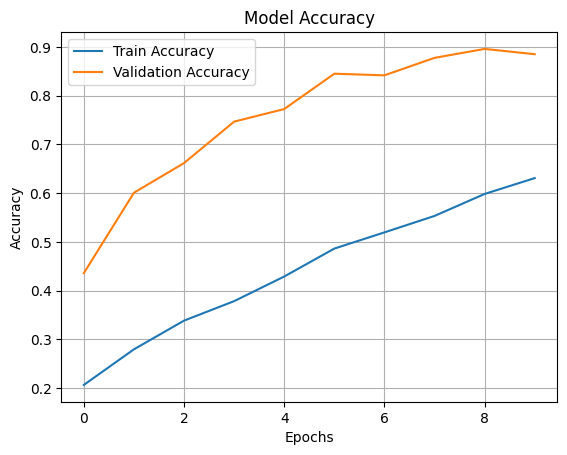

In [13]:
# ✅ Step 6: Evaluate the Model
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
# ✅ Step 5: Train the Model
history2 = model_c.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    steps_per_epoch=len(train_gen),
    validation_steps=len(val_gen)
)

Epoch 1/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 203s 337ms/step - accuracy: 0.6328 - loss: 1.1503 - val_accuracy: 0.9083 - val_loss: 0.3208
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 222s 369ms/step - accuracy: 0.6499 - loss: 1.1082 - val_accuracy: 0.9258 - val_loss: 0.2639
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 237s 395ms/step - accuracy: 0.6966 - loss: 0.9052 - val_accuracy: 0.9267 - val_loss: 0.2524
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 244s 407ms/step - accuracy: 0.7257 - loss: 0.8113 - val_accuracy: 0.9350 - val_loss: 0.2273
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 248s 413ms/step - accuracy: 0.7462 - loss: 0.7175 - val_accuracy: 0.9417 - val_loss: 0.2094
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 251s 418ms/step - accuracy: 0.7547 - loss: 0.7242 - val_accuracy: 0.9467 - val_loss: 0.1784
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 254s 423ms/step - accuracy: 0.7742 - loss: 0.6700 - val_accuracy: 0.9483 - val_loss: 0.1823
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 263s 438ms/step - accuracy: 0.7921 -

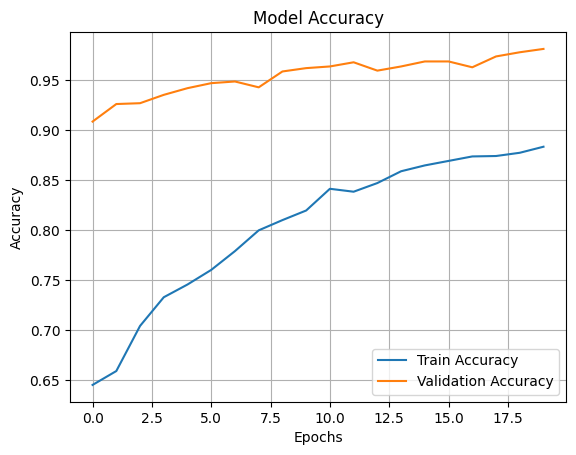

In [22]:
# ✅ Step 6: Evaluate the Model
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
model_c.save("hair_disease_classifier_accur.h5")